# MNIST

"The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning."

In [18]:
# Step 1: Import the Dependencies

# Usual dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np

# new dependencies
from IPython.display import Image, SVG
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler #this scales the data based on the minimum and maximum values

# keras specific dependencies
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from keras.datasets import mnist

### Preprocessing

In [19]:
# Step 2: load in the MNIST data using the cariable format (X_train, y_train), (X_test, y_test)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Data Features Shape: {X_train.shape}")
print("-----" * 4)
print(f"Data Labels Shape: {y_train.shape}")

Data Features Shape: (60000, 28, 28)
--------------------
Data Labels Shape: (60000,)


In [20]:
# Note: the features is a 3dimensional array and the labels are 1dimensional

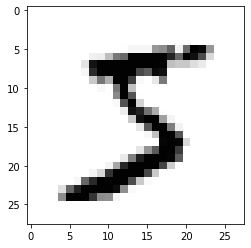

In [21]:
# Step 3: Plot the data to see what it looks like

plt.imshow(X_train[0, :, :], cmap=plt.cm.Greys)

Each image is a 28x28 pixel greyscale image with values 0-255 (color scale)  

That is usually what an image is. It is an array of pixels ranging from 0-255

In [22]:
print(X_train[0,:,:])

# view the below and you can sort of see the image structure using the numbers

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### I need to flatten the data into rows of 1d image arrays in order to make a neural network

In [25]:
# Step 4: To "flatten" the data,we multiply the second and third dimensions (28 * 28)
ndims = X_train.shape[1] * X_train.shape[2]

In [26]:
# Step 5: Then I reshape the datasets to match a 2dimensional numpy array (60000, 784)
X_train = X_train.reshape(X_train.shape[0], ndims)
X_test = X_test.reshape(X_test.shape[0], ndims)

In [28]:
print(f"Training Data: {X_train.shape}")
print(f"Testing Data: {X_test.shape}")

Training Data: (60000, 784)
Testing Data: (10000, 784)


### I scale and normalize the dataset to 0-1. This makes the weights a little more "balanced" than if it were 0-255

In [29]:
# Step 6: Scale and Normalize the datasets using MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

In [30]:
# Step 7: Transform the X_train and the X_test to the trained and scaled dataset
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### This concludes the preprocessing of the features

### Next step is to preprocess the labels (outputs)